<a href="https://colab.research.google.com/github/jhengineer/DeepLearning/blob/main/Copy_of_1_K_NearestNeighborAgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

bl = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bw = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
sl = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
sw = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

len = bl+sl # list 두개를 합친다. 원소가 많아짐. total #49
wgh = bw+sw # list 두개를 합친다. 원소가 많아짐. total #49
plt.scatter(bl, bw)
plt.scatter(sl, sw)
plt.xlabel('length')
plt.ylabel('wegith')
plt.show


In [ ]:
fish_data=[[l,w] for l, w in zip(len, wgh)]

fish_target = [1]*35 +[0]*14 # target 분류 도미와 빙어 2개라 0,1, 만약 4개면 0,1,2,3 되겠지.
# 도미가 1 이고, 35개 data 갯수고, 빙어는 0 이고, 14개 data갯수다. total #49

In [ ]:
''' K nearest neighbor 최근접 이웃.
    K 값의 default값은 5
  사이키런 라이브러리-알고리즘(분류, 회귀, 클러스터링 등)과 데이터전처리, 모델 선택 등의 유용도구들을 제공파이썬패키지
  sklearn은 2차원 배열이다!
'''

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier() #객체를 만든다. kn을 쓰기위해
kn.fit(fish_data, fish_target) # fit = train 이라 생각하면된다.
kn.score(fish_data, fish_target) # 정확도 Accuracy 평가하는 100점이 1.0이고 0점이 0.5 점이다.

'''
49개 data를 전부 트레이닝해서 또 같은데이터로 예측한(score)한 것이기 때문에 값은 1.0나오겠지.
'''

'\n49개 data를 전부 트레이닝해서 또 같은데이터로 예측한(score)한 것이기 때문에 값은 1.0나오겠지.\n'

In [ ]:
kn.predict([[30,600]])

#array([1])  = 결과가 1로 예측됨 도미.


array([1])

In [ ]:
#이번에는 다르게 구성해보자. k neighbor  default값 을 바꿔ㅓ 49로 해보자.
#즉, data set 전부를 neighbor라 생각하는거지.
#다음번 공부할떄 KNN 더 자세히 파라메터 다 공부하자.
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target) # 타겟은 도미 1 빙어 0
kn49.score(fish_data, fish_target)

'''
결과값은이 0.7인 이유는 가까운 이웃 데이터가 데이터 전체개수 이니까
도미데이터는 100% 도미라 나오고 빙어도 도미라나온다. 도미데이터가 많으니까..
70%이니까 뭘 넣어도 도미야. 30%정도 인 빙어 데이터는 예측이 틀리게 나오니까.
빙어 예측이 다 틀리니까..
'''
print(35/49) #값이 kn49.score(fish_data, fish_target) 랑 똑 같다.


0.7142857142857143


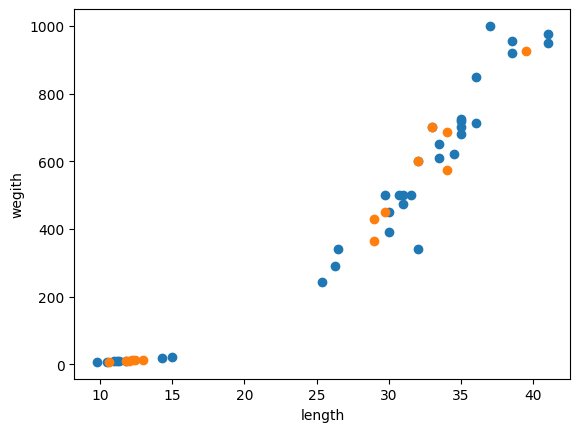

In [ ]:
'''
훈련세트와 테스트세트를 데이터에서 분리하자.
위에는 훈련과 테스트세트를 같이 썼는데 의미가 없잖어.
나누자
'''
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

index = np.arange(49) #[0,2,3,...48]
np.random.shuffle(index) # random shuffled index like[5,20,13...]

'''data를 섞을때 index로 하는이유는 물론 전부 섞어도 되지만..data가 많을때는 시간이 너무 많이 걸려.
   그래서 index만 섞어서 나중에 data set 을 섞어진 걸로 만들면 되. 그게 더 좋으니까 외워.
'''

train_input = input_arr[index[ :35]]
train_traget = target_arr[index[ :35]]

test_input= input_arr[index[35: ]]
test_target = target_arr[index[35: ]]

kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_traget)

kn.score(test_input,test_target)


#graph
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0],train_input[: , 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

plt.xlabel('length')
plt.ylabel('wegith')
plt.show()

